# Data Tranformation

In [ ]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 50.3 kB/s eta 0:00:000:00:05m eta 0:00:10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 60.1 kB/s eta 0:00:0031m57.0 kB/s eta 0:00:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 41.4 kB/s eta 0:00:0031m37.7 kB/s eta 0:00:05
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 41.1 kB/s eta 0:00:00m eta 0:00:010:07:17


In [ ]:
!pip install Pillow

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
path_dir = '../data/combined/train'

In [ ]:
names = []
nums = []
data = {'class':[], 'amount':[]}

for i in os.listdir(path_dir):
    nums.append(len(os.listdir(path_dir+'/'+i)))
    names.append(i)

data['class']  += names
data['amount'] += nums

df = pd.DataFrame(data)
df

class  amount
0  Apple_Scab     384
1     Healthy     384
2  Apple_Rust     384

In [ ]:
test_dir = '../data/combined/test'

In [ ]:
names = []
nums = []
data = {'class':[], 'amount':[]}

for i in os.listdir(test_dir):
    nums.append(len(os.listdir(test_dir+'/'+i)))
    names.append(i)

data['class']  += names
data['amount'] += nums

df_test = pd.DataFrame(data)
df_test

class  amount
0  Apple_Scab     112
1     Healthy     112
2  Apple_Rust     112

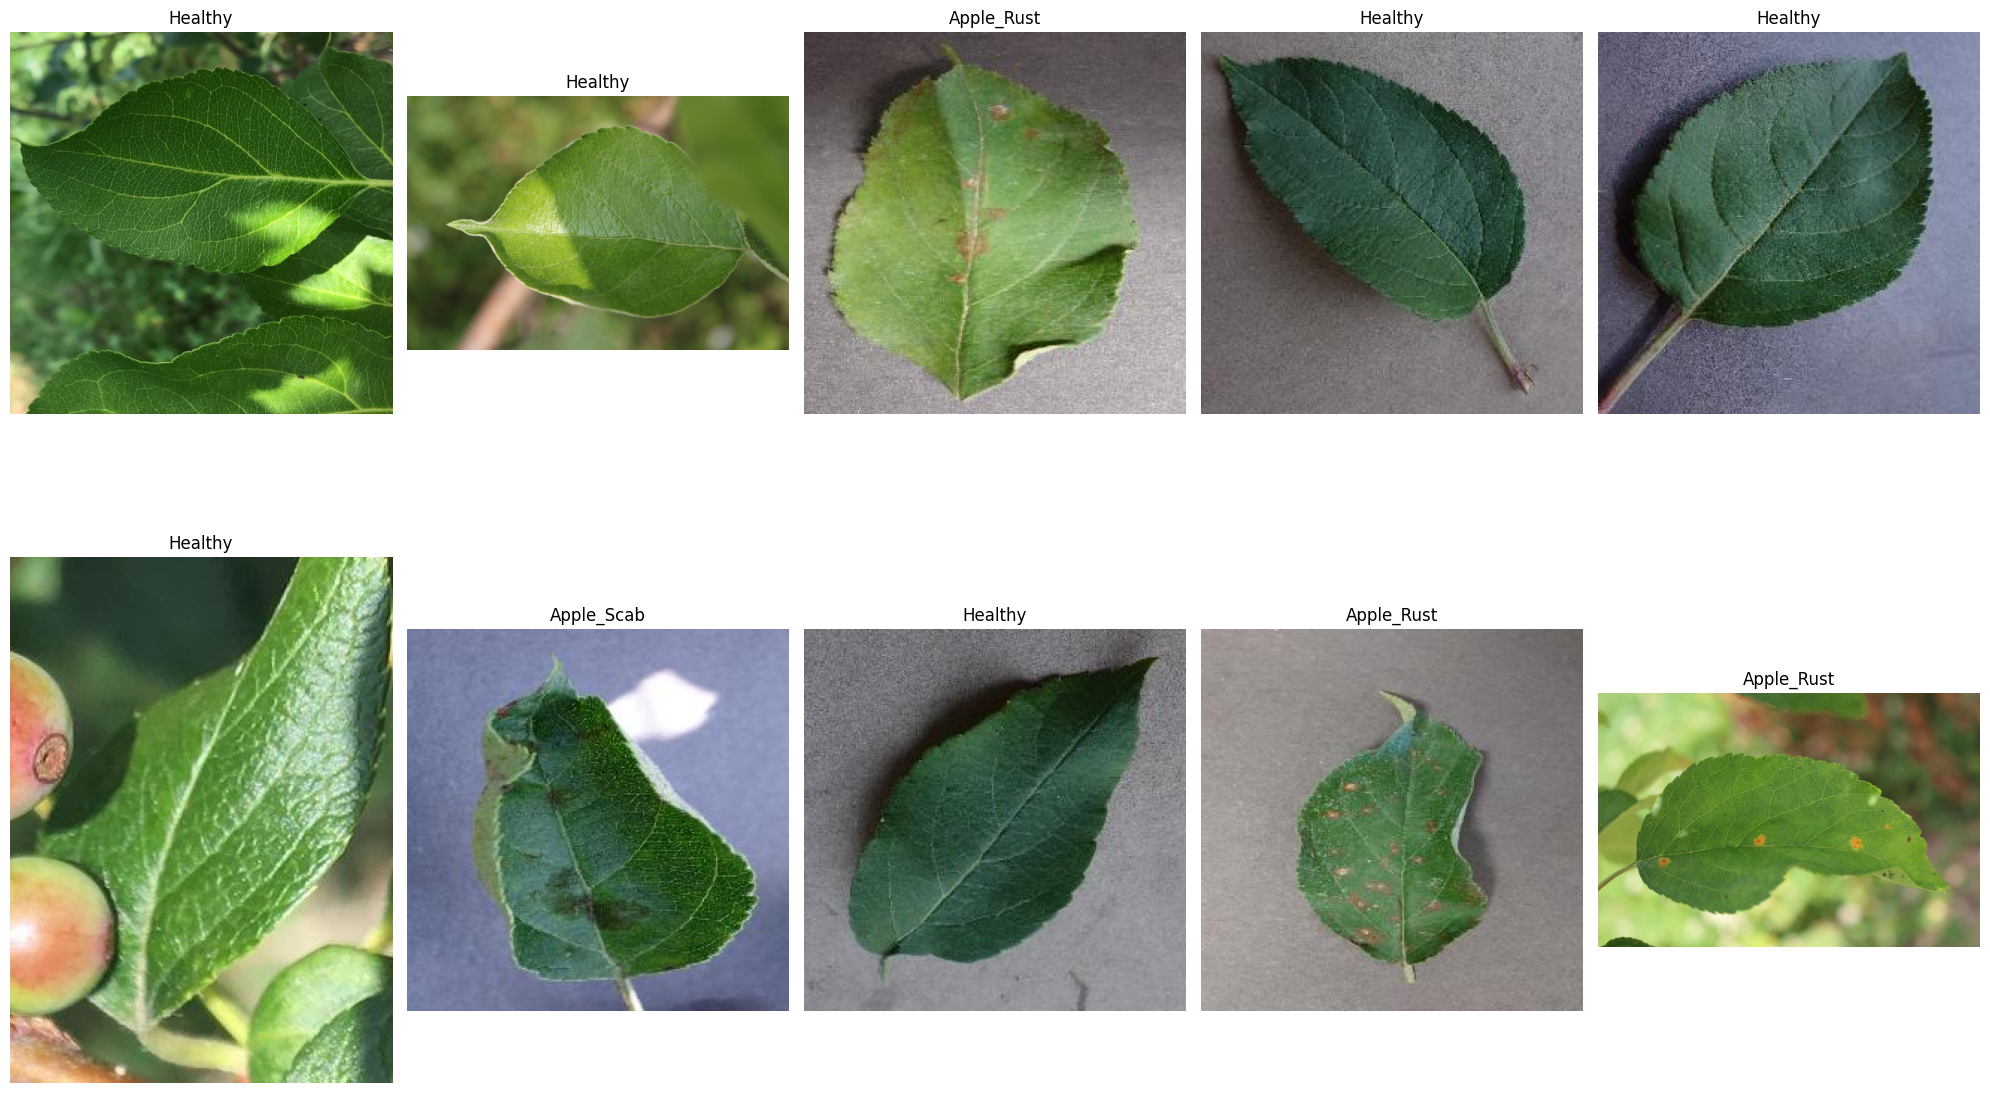

In [ ]:
classes = os.listdir(path_dir)

plt.figure(figsize=(20,30))

# Tampilkan 10 gambar secara random
for x in range(10):
    # pilih kelas secara acak
    i = random.randint(0, len(classes) - 1)
    class_path = os.path.join(path_dir, classes[i])

    images = os.listdir(class_path)

    # pilih gambar secara acak
    j = random.randint(0, len(images) - 1)
    image_path = os.path.join(class_path, images[j])

    # buka gambar
    try:
        image = Image.open(image_path)

        # tampilkan gambar
        ax = plt.subplot(5, 5, x + 1)
        plt.imshow(image)
        plt.title(classes[i])
        plt.axis('off')

    except Exception as e:
        print(f"Gagal membuka gambar {image_path}: {e}")

plt.tight_layout()
plt.show()

## Contoh Augmentasi Gambar

In [2]:
!pip install tensorflow

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

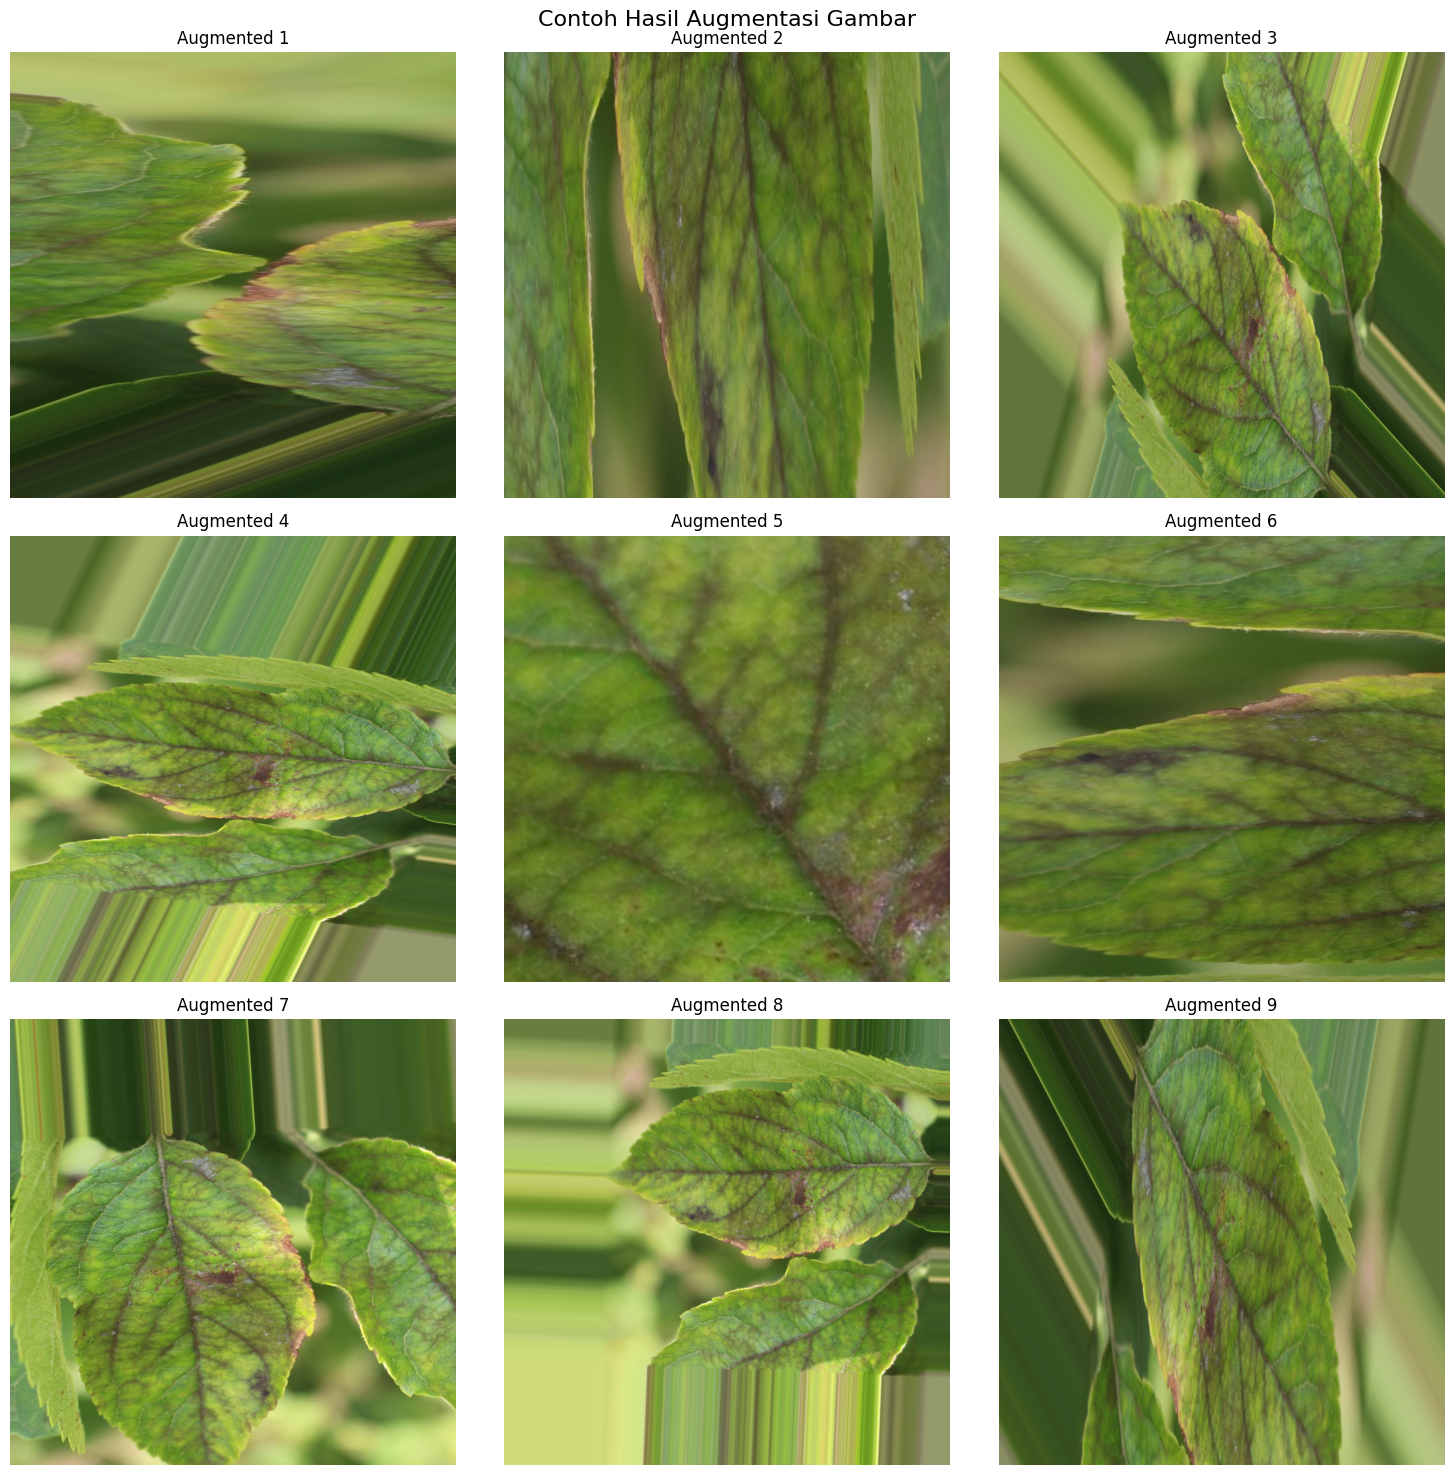

In [4]:
# Path gambar contoh
image_path = 'sample.jpg'

# Inisialisasi generator
data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=[0.2, 1.8],
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# Load dan siapkan gambar
img = load_img(image_path)
img_array = img_to_array(img)
img_array = img_array.reshape((1,) + img_array.shape)

# Buat iterator augmentasi
aug_iter = data_generator.flow(img_array, batch_size=1)

# Tampilkan beberapa hasil augmentasi
plt.figure(figsize=(15, 15))
for i in range(9):  # Tampilkan 9 augmentasi
    aug_img = next(aug_iter)[0]
    plt.subplot(3, 3, i + 1)
    plt.imshow(aug_img)
    plt.axis('off')
    plt.title(f'Augmented {i+1}')

plt.suptitle("Contoh Hasil Augmentasi Gambar", fontsize=16)
plt.tight_layout()
plt.show()
